# Assignment on preprocessing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Loading the dataset into python environment 
# 2. Make ‘PassengerId’ as the index column

In [2]:
titanic_data = pd.read_csv('titanic_dataset.csv',index_col='PassengerId')

In [3]:
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset


In [4]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


# 4.Fill in all the missing values present in all the columns in the dataset

In [8]:
titanic_data['Age'].fillna(round(titanic_data['Age'].mean(),1),inplace=True)
titanic_data["Cabin"].fillna(value='Not Known',inplace=True)
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode(),inplace=True)
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S


# 5.Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'box plot of Fare')

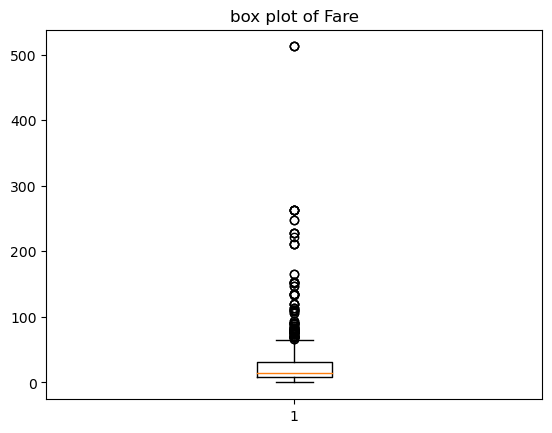

In [9]:
plt.boxplot(titanic_data['Fare'])
plt.title('box plot of Fare')

In [10]:
Q1=np.percentile(titanic_data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(titanic_data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(titanic_data['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

-26.724
65.6344


C:\Users\USER\AppData\Local\Temp\ipykernel_1204\177221089.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(titanic_data['Fare'],25,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_1204\177221089.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(titanic_data['Fare'],50,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_1204\177221089.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'hi

In [11]:
outlier=[]
for x in titanic_data['Fare']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)
titanic_data['Fare']=np.where(titanic_data['Fare']>upp_lim,upp_lim,np.where(titanic_data['Fare']<low_lim,low_lim,titanic_data['Fare']))
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,65.6344,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S


Text(0.5, 1.0, 'box plot of Fare')

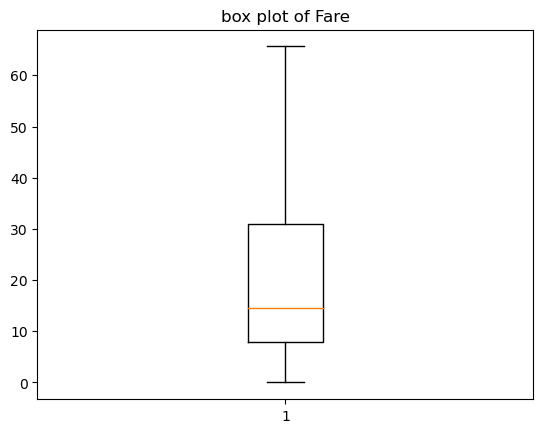

In [12]:
plt.boxplot(titanic_data['Fare'])
plt.title('box plot of Fare')

Text(0.5, 1.0, 'box plot of Age')

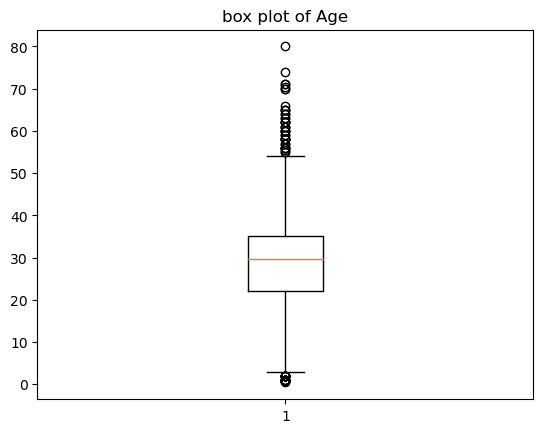

In [13]:
plt.boxplot(titanic_data['Age'])
plt.title('box plot of Age')

In [14]:
Q1=np.percentile(titanic_data['Age'],25,interpolation='midpoint')
Q2=np.percentile(titanic_data['Age'],50,interpolation='midpoint')
Q3=np.percentile(titanic_data['Age'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

2.5
54.5


C:\Users\USER\AppData\Local\Temp\ipykernel_1204\3851808356.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(titanic_data['Age'],25,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_1204\3851808356.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(titanic_data['Age'],50,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_1204\3851808356.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'h

In [15]:
outlier=[]
for x in titanic_data['Age']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)
titanic_data['Age']=np.where(titanic_data['Age']>upp_lim,upp_lim,np.where(titanic_data['Age']<low_lim,low_lim,titanic_data['Age']))
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,65.6344,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S


Text(0.5, 1.0, 'box plot of Age')

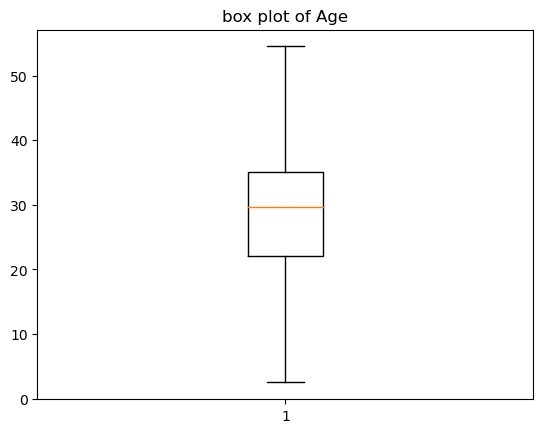

In [16]:
plt.boxplot(titanic_data['Age'])
plt.title('box plot of Age')

Text(0.5, 1.0, 'box plot of SibSp')

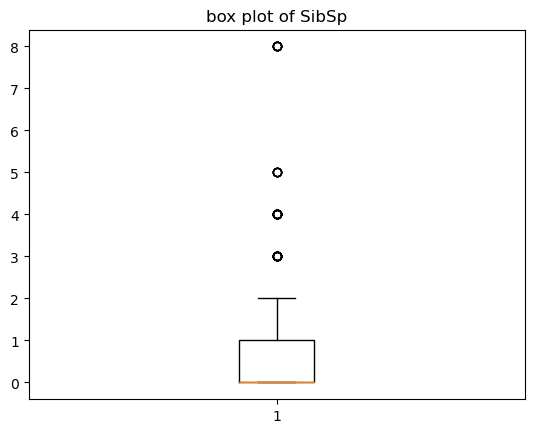

In [17]:
plt.boxplot(titanic_data['SibSp'])
plt.title('box plot of SibSp')

# 6. min max scaling on the feature set (Take ‘Survived’ as target)

In [19]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
x=titanic_data.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

In [21]:
df= pd.get_dummies(titanic_data)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,1,38.0,1,0,65.6344,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [22]:
y=df['Survived']
x=df.drop('Survived',axis=1)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
pred=model.predict(x_test)
print('MSE is ', mean_squared_error(y_test, pred))
from sklearn.metrics import r2_score
print('R squared value is ', r2_score(y_test, pred))

MSE is  0.11995430771194741
R squared value is  0.5053467215703337


In [23]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,2))
x = min_max.fit_transform(x)
print(x)
x=pd.DataFrame(x)
x.describe()

[[2.         0.75       0.25       ... 0.         2.         0.        ]
 [0.         1.36538462 0.25       ... 0.         0.         0.        ]
 [2.         0.90384615 0.         ... 0.         2.         0.        ]
 ...
 [2.         1.04611991 0.25       ... 0.         2.         0.        ]
 [0.         0.90384615 0.         ... 0.         0.         0.        ]
 [2.         1.13461538 0.         ... 2.         0.         0.        ]]


,0,1,2,3,4,5,6,7,8,9,...,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,1.308642,1.033724,0.130752,0.127198,0.732750,0.002245,0.002245,0.002245,0.002245,0.002245,...,0.006734,0.002245,0.004489,0.008979,0.002245,1.542088,0.377104,0.172840,1.445567,0.004489
std,0.836071,0.463924,0.275686,0.268686,0.624112,0.067003,0.067003,0.067003,0.067003,0.067003,...,0.115921,0.067003,0.094703,0.133779,0.067003,0.840794,0.782744,0.562281,0.895752,0.094703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.750000,0.000000,0.000000,0.241044,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.046120,0.000000,0.000000,0.440446,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
75%,2.000000,1.250000,0.250000,0.000000,0.944627,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
pred=model.predict(x_test)
print('MSE is ', mean_squared_error(y_test, pred))
from sklearn.metrics import r2_score
print('R squared value is ', r2_score(y_test, pred))

MSE is  0.12010087536961812
R squared value is  0.5047423233310252
